In [5]:
import pandas as pd
# pd.set_option('display.max_rows', None)
df = pd.read_csv('dataset/words.txt', sep=" ", header=None,usecols=range(9))

file_name=df.iloc[:,0]
word_id=df.iloc[:,-1]


folder = file_name.str.split("-",expand=True) 
folder1=folder.iloc[:,0]
folder2=folder1+'-'+folder.iloc[:,1]
df

,0,1,2,3,4,5,6,7,8
0,a01-000u-00-00,ok,154,408,768,27,51,AT,A
1,a01-000u-00-01,ok,154,507,766,213,48,NN,MOVE
2,a01-000u-00-02,ok,154,796,764,70,50,TO,to
3,a01-000u-00-03,ok,154,919,757,166,78,VB,stop
4,a01-000u-00-04,ok,154,1185,754,126,61,NPT,Mr.
5,a01-000u-00-05,ok,154,1438,746,382,73,NP,Gaitskell
6,a01-000u-00-06,ok,154,1896,757,173,72,IN,from
7,a01-000u-01-00,ok,156,395,932,441,100,VBG,nominating
8,a01-000u-01-01,ok,156,901,958,147,79,DTI,any
9,a01-000u-01-02,ok,156,1112,958,208,42,AP,more


A


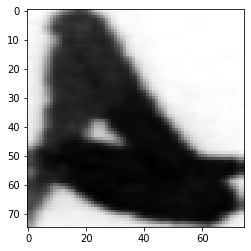

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
DATADIR="dataset/words"
training_data=[]
IMG_SIZE=75
    
for x,y,z,a in zip(folder1,folder2,file_name,word_id):
    path=os.path.join(DATADIR,x,y)
    name="{}.png".format(z)
    class_num=a
    print(a)
   
    img_array=cv2.imread(os.path.join(path,name),cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    plt.imshow(new_array,cmap="gray")
    plt.show()
    break

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
DATADIR="dataset/words"
training_data=[]
IMG_SIZE=50
def create_training_data():
    
    for x,y,z,a in zip(folder1,folder2,file_name,word_id):
        path=os.path.join(DATADIR,x,y)
        name="{}.png".format(z)
        class_num=a
        
        try:
            img_array=cv2.imread(os.path.join(path,name),cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,a])
        except Exception as e:
            pass
create_training_data()
            

In [8]:
x=[]
y=[]
y_id=[]


for features,label in training_data:
    x.append(features)
    y.append(label)
    
x=np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)     
y=pd.DataFrame(y)    
y.columns = ['ids']

y['grpId']=y.groupby('ids').ngroup().add(1)
y_new=y.iloc[:,1]
y_new2=y.iloc[:,0]
for xx in y_new:
    y_id.append(xx)
y_no_dup=y.drop_duplicates(subset=['ids', 'grpId'])
ans=y_no_dup.loc[y['grpId'] == 835].ids.values.item()
ans


'.'

In [6]:
# x=[]
# yk=[]

# for features,label in training_data:
#     x.append(features)
#     yk.append(label) 

 
# dfs=pd.DataFrame(y)
# len(dfs.groupby([0]).count())

In [17]:
import pickle
pickle_out=open("x.pickle",'wb')
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle",'wb')
pickle.dump(y_id,pickle_out)
pickle_out.close()

pickle_out=open("z.pickle",'wb')
pickle.dump(y_no_dup,pickle_out)
pickle_out.close()

pickle_out=open("ydata.pickle",'wb')
pickle.dump(y,pickle_out)
pickle_out.close()

In [70]:
import cv2
import tensorflow as tf
import numpy as np
def prepare(filepath):
    IMG_SIZE=50
    img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,1)  
model=tf.keras.models.load_model('model2.model')
prediction=model.predict([prepare('testwords/of.jpg')])
print(prediction)


[[0. 0. 0. ... 0. 0. 0.]]


In [69]:
prediction=model.predict([prepare('testwords/that.jpg')])
h=np.argmax(prediction[0])
print(h)
print(y_no_dup.loc[y['grpId'] == h].ids.values.item())

10025
that
